# Finite Difference Methods for Partial Differential Equations #

This notebook contains solutions to parabolic, hyperbolic and elliptic partial differential equation problems using finite difference methods. The python package ``sympy`` will be used throughout for ease of problem specification.

In [1]:
from sympy import *
from sympy.abc import x, t
init_printing()

## Parabolic Problems : Example 1#

Example 1: default problem


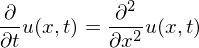

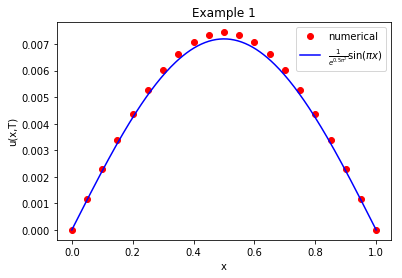

Absolute error = 0.00079202


In [3]:
from pdeproblem import ParabolicProblem
from parabolicsolvers import forwardeuler, backwardeuler, cranknicholson

mx = 20; mt = 500

# Example 1
dp1 = ParabolicProblem()

# print the problem specification using LaTeX
dp1.pprint('Example 1: default problem')

# exact solution
u = exp(-(pi**2)*t)*sin(pi*x)

# solve the PDE problem at time T = 0.5
uT, err = dp1.solve_at_T(0.5, mx, mt, backwardeuler, u_exact=u, title='Example 1')
print('Absolute error = {:.8f}'.format(err))

## Example 2: Inhomogeneous Dirichlet Condition ##

Diffusion Example 2


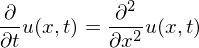

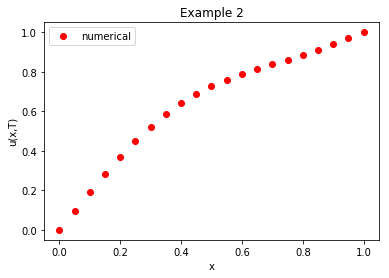

In [4]:
from pdeproblem import Dirichlet

# Example 2 (inhomogeneous Dirichlet condition)
# u(1,t) = 1

# specify the Dirichlet condition with a Dirichlet object, 
# Dirichlet(x, f(t))

dp2 = ParabolicProblem(rbc=Dirichlet(1,1))

dp2.pprint('Diffusion Example 2')

# with backward Euler this time
uT, _ = dp2.solve_at_T(0.05, mx, mt, backwardeuler, title='Example 2')

## Example 3: Homogeneous Neumann Conditions ##

Diffusion Problem 3


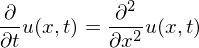

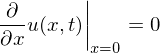

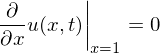

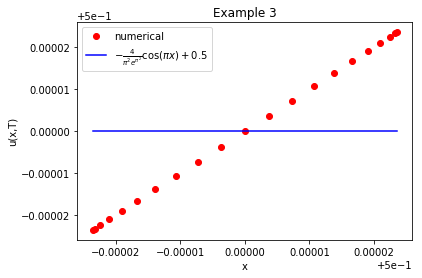

Absolute error = 0.00007823


In [6]:
from pdeproblem import Neumann


dp5 = ParabolicProblem(lbc=Neumann(0,0), rbc=Neumann(1,0), ic=x)
dp5.pprint('Diffusion Problem 3')

# exact solution can only be obtained in terms of a Fourier series, so we'll compare with the first term
u_first = 0.5 - (4/pi**2)*exp(-pi**2*t)*cos(pi*x)

# Crank-Nicholson this time, at time t = 1 to allow higher order terms in the series to die out
uT, err = dp5.solve_at_T(1, mx, mt, backwardeuler, u_exact=u_first, title='Example 3')
print('Absolute error = {:.8f}'.format(err))

## Example 4: Constant Source Function ##

Diffusion Problem 4


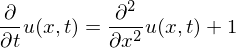

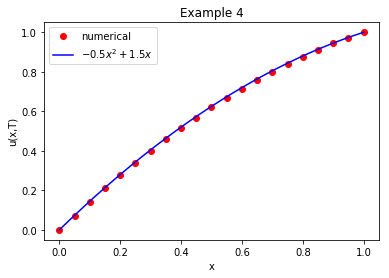

Absolute error = 0.01713665


In [34]:
dp4 = ParabolicProblem(source=1, rbc=Dirichlet(1,1), ic=0)
dp4.pprint('Diffusion Problem 4')

# let's compare with the steady state solution this time
ss = -0.5*x**2 + 1.5*x
ut, err = dp4.solve_at_T(0.5, mx, mt, forwardeuler, u_exact=ss, title='Example 4')
print('Absolute error = {:.8f}'.format(err))

## Example 5: Spatially Varying Source Function

Diffusion Problem 7


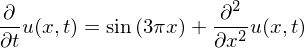

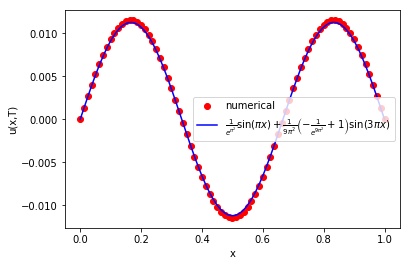

Absolute error = 0.00166355


In [38]:
mx=80; mt=2000

dp7 = ParabolicProblem(source=sin(3*pi*x), ic=sin(pi*x))
dp7.pprint('Diffusion Problem 7')

u = exp(-(pi**2)*t)*sin(pi*x) + \
        (1/(3*pi)**2)*(1 - exp(-9*pi**2*t))*sin(3*pi*x)

uT, err = dp7.solve_at_T(1, mx, mt, cranknicholson, u_exact = u)
print('Absolute error = {:.8f}'.format(err))